# Challenge: Boston Marathon

The [data](https://github.com/llimllib/bostonmarathon) contains information on the Boston Marathon results from the year 2014. It was collected from [BAA.org](https://BAA.org).  
It has 21 columns and 31984 observations. 

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df.shape

(31984, 21)

In [4]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


# Exploration and Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [6]:
df = df.drop(['name', 'ctz', 'country', 'bib', 'state', 'city'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 15 columns):
10k          31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
genderdiv    31984 non-null int64
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [8]:
#for i in range(len(df)):
#    q = float(df['25k'][i])
#   print(i, df['25k'][i])

In [9]:
df['10k'][3189]

'-'

In [10]:
len(df[df['40k'] == '-'])

39

In [11]:
# Drop blank times for 5K
df = df[df['5k'] != '-']
df['5k'] = df['5k'].astype('float64')

In [12]:
# Drop blank times for 40K
df = df[df['40k'] != '-']
df['40k'] = df['40k'].astype('float64')

In [13]:
# Drop blank times for 20k
df = df[df['20k'] != '-']
df['20k'] = df['20k'].astype('float64')

In [14]:
# Drop blank times for half
df = df[df['half'] != '-']
df['half'] = df['half'].astype('float64')

In [15]:
# Drop blank times for 30K
df = df[df['30k'] != '-']
df['30k'] = df['30k'].astype('float64')

In [16]:
# Drop blank times for 35K
df = df[df['35k'] != '-']
df['35k'] = df['35k'].astype('float64')

In [17]:
# Drop blank times for 25K
df = df[df['25k'] != '-']
df['25k'] = df['25k'].astype('float64')

In [18]:
# Drop blank times for 10K
df = df[df['10k'] != '-']
df['10k'] = df['10k'].astype('float64')

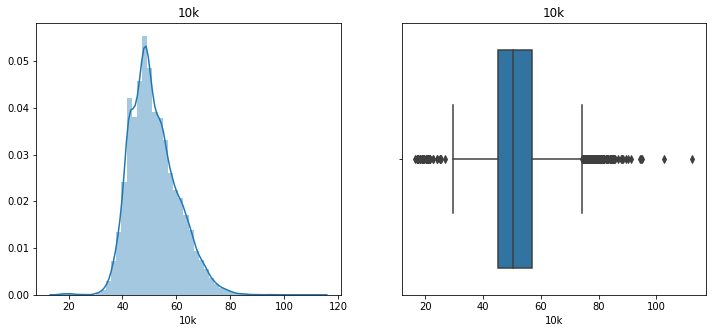

In [19]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['10k'])
plt.title('10k')

plt.subplot(1, 2, 2)
sns.boxplot(df['10k'])
plt.title('10k')

plt.show()

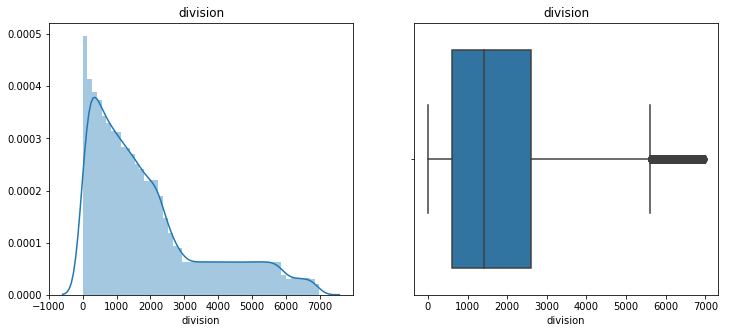

In [20]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['division'])
plt.title('division')

plt.subplot(1, 2, 2)
sns.boxplot(df['division'])
plt.title('division')

plt.show()

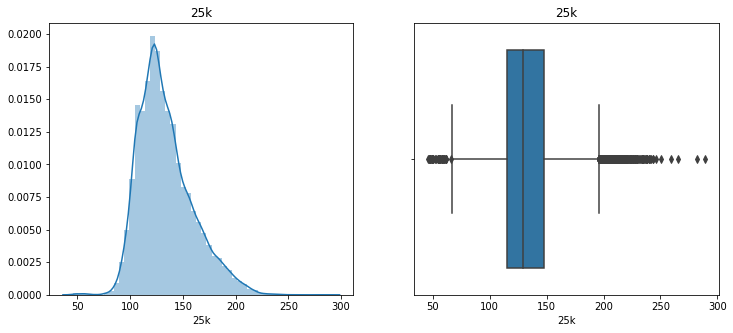

In [21]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['25k'])
plt.title('25k')

plt.subplot(1, 2, 2)
sns.boxplot(df['25k'])
plt.title('25k')

plt.show()

In [22]:
df['gender'] = np.where(df['gender'] == 'M', 0, 1)

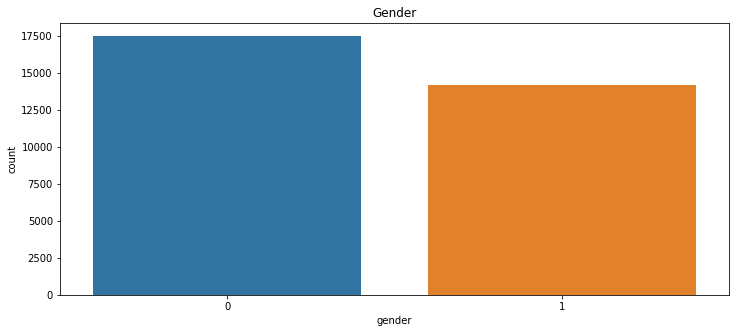

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(x="gender", data=df);
plt.title('Gender')


plt.show()

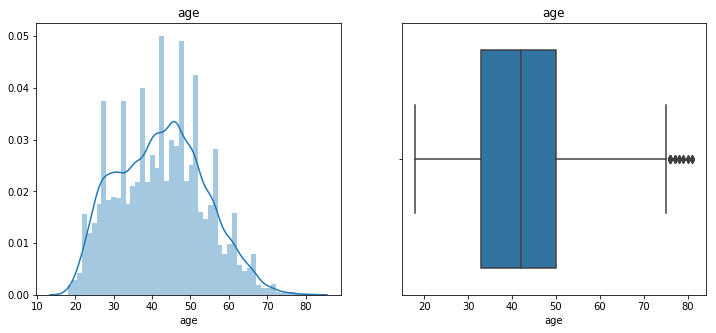

In [24]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['age'])
plt.title('age')

plt.subplot(1, 2, 2)
sns.boxplot(df['age'])
plt.title('age')

plt.show()

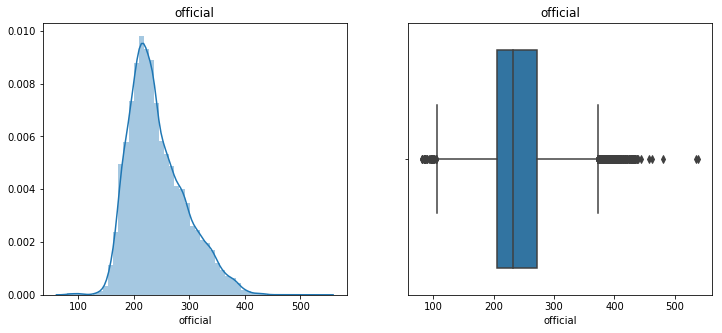

In [25]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['official'])
plt.title('official')

plt.subplot(1, 2, 2)
sns.boxplot(df['official'])
plt.title('official')

plt.show()

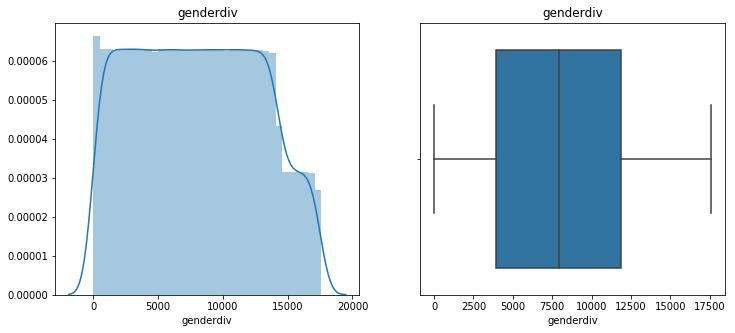

In [26]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['genderdiv'])
plt.title('genderdiv')

plt.subplot(1, 2, 2)
sns.boxplot(df['genderdiv'])
plt.title('genderdiv')

plt.show()

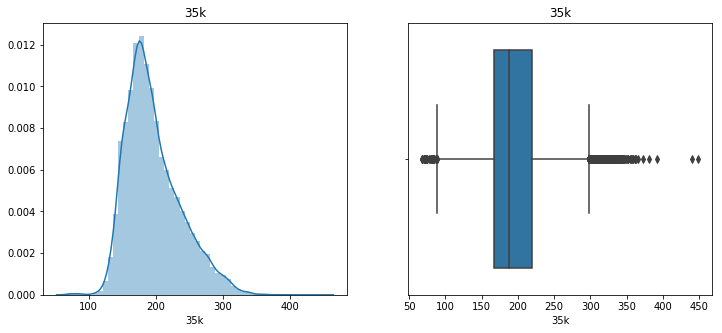

In [27]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['35k'])
plt.title('35k')

plt.subplot(1, 2, 2)
sns.boxplot(df['35k'])
plt.title('35k')

plt.show()

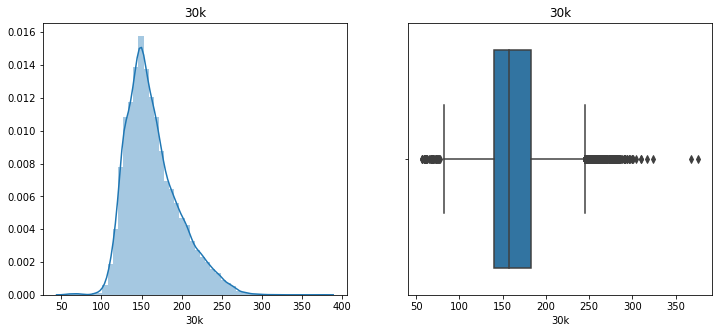

In [28]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['30k'])
plt.title('30k')

plt.subplot(1, 2, 2)
sns.boxplot(df['30k'])
plt.title('30k')

plt.show()

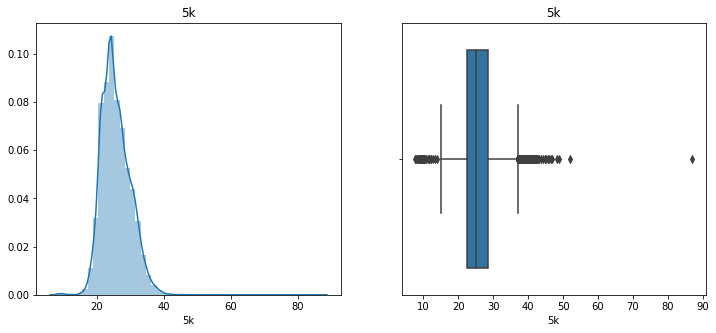

In [29]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['5k'])
plt.title('5k')

plt.subplot(1, 2, 2)
sns.boxplot(df['5k'])
plt.title('5k')

plt.show()

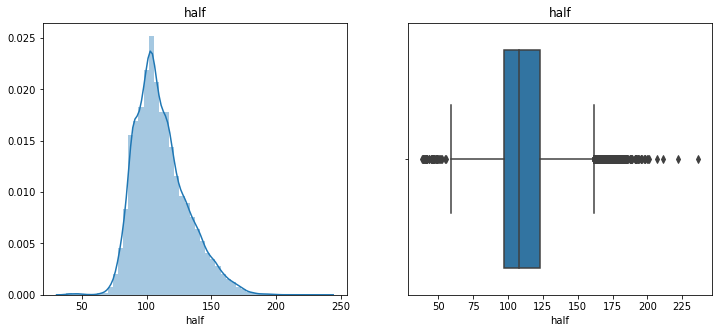

In [30]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['half'])
plt.title('half')

plt.subplot(1, 2, 2)
sns.boxplot(df['half'])
plt.title('half')

plt.show()

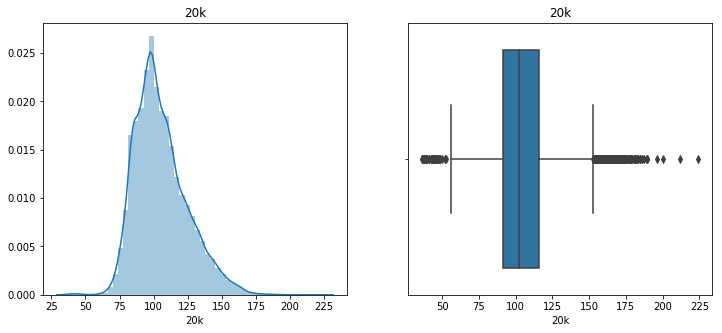

In [31]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['20k'])
plt.title('20k')

plt.subplot(1, 2, 2)
sns.boxplot(df['20k'])
plt.title('20k')

plt.show()

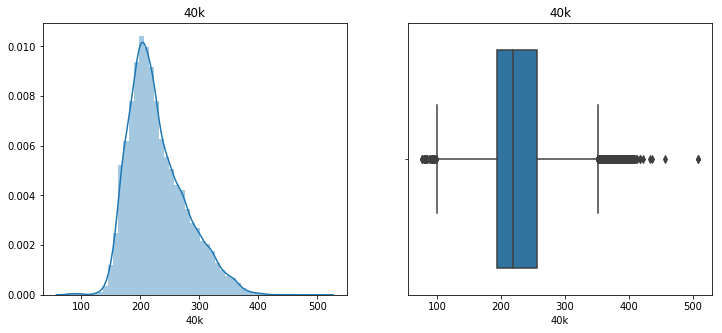

In [32]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['40k'])
plt.title('40k')

plt.subplot(1, 2, 2)
sns.boxplot(df['40k'])
plt.title('40k')

plt.show()

In [33]:
#normalize the data 
df_norm = normalize(df)

# Modeling

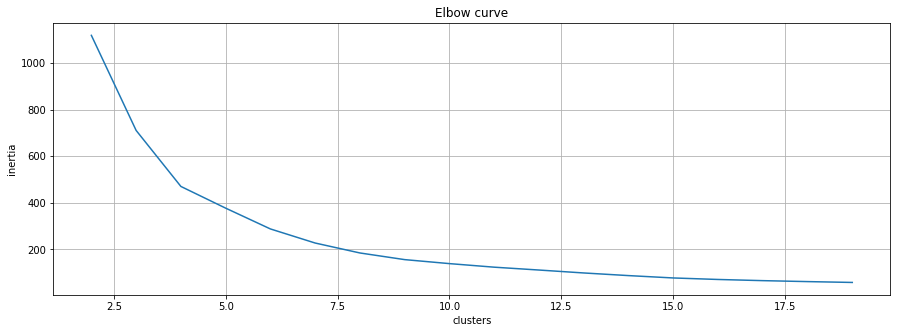

In [55]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_norm)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel("clusters")
plt.ylabel('inertia')
plt.show()

In [34]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=3).fit_predict(df_norm)

In [35]:
df['cluster'] = y_pred

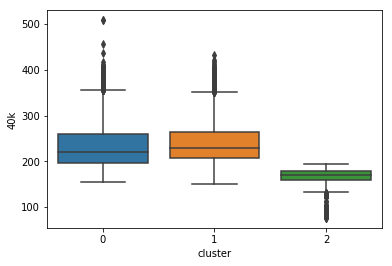

In [36]:
sns.boxplot(x="cluster", y="40k", data=df)
plt.show()

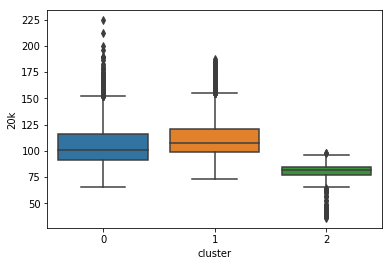

In [37]:
sns.boxplot(x="cluster", y="20k", data=df)
plt.show()

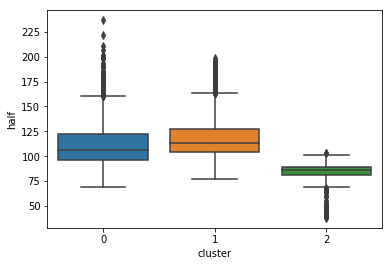

In [38]:
sns.boxplot(x="cluster", y="half", data=df)
plt.show()

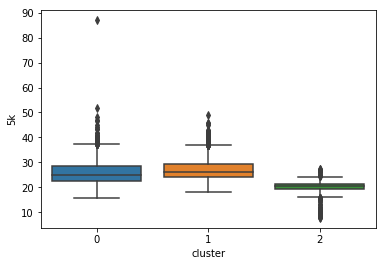

In [39]:
sns.boxplot(x="cluster", y="5k", data=df)
plt.show()

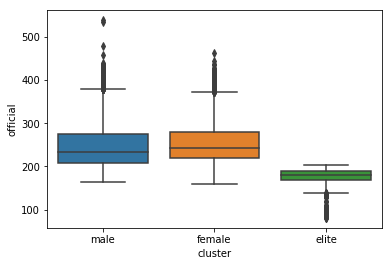

In [57]:
sns.boxplot(x="cluster", y="official", data=df)
plt.xticks(np.arange(3), ('male', 'female', 'elite'))
plt.show()

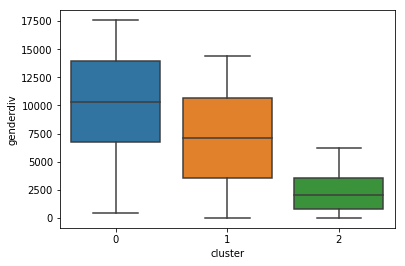

In [41]:
sns.boxplot(x="cluster", y="genderdiv", data=df)
plt.show()

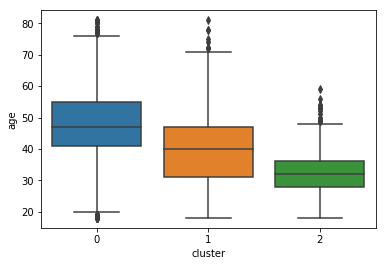

In [42]:
sns.boxplot(x="cluster", y="age", data=df)
plt.show()

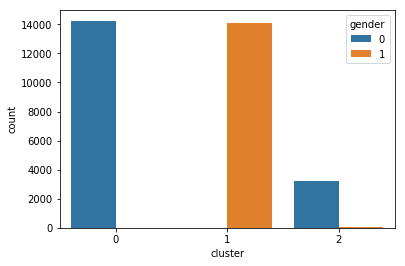

In [43]:
sns.countplot(x="cluster", hue="gender", data=df)
plt.show()

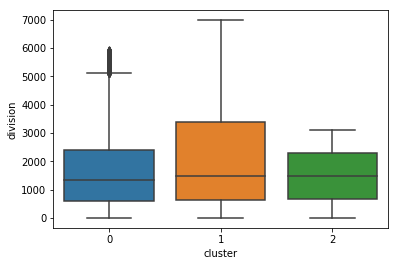

In [44]:
sns.boxplot(x="cluster", y="division", data=df)
plt.show()

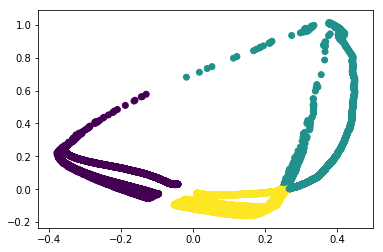

In [45]:
#See what it looks like with 2 deminsions 
X_pca = PCA(2).fit_transform(df_norm)

# Calculate predicted values.
y_pred_pca = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_pca)
plt.show()

# Conclusion

#### The 2014 Boston Marathon included 31984 runners from all over the world.  
#### Looking at the distribution of the times you can see that the runners times has a right-skew, and a mean time 241.95 minutes.

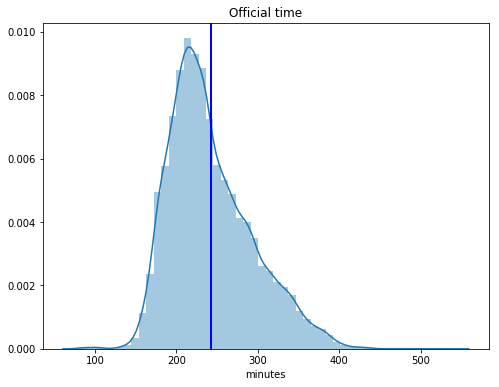

241.95238269771363


In [52]:
plt.figure(figsize=(8,6))

sns.distplot(df['official'])
plt.title('Official time')
plt.axvline(df['official'].mean(), color='b', linewidth=2)
plt.xlabel("minutes")

plt.show()
print(df['official'].mean())

#### However there is more to the story as some runners are running to win the race, while most are running as a personal accomplishment. Analyzing the groups independently will allow for better insight on how the runners performed.

#### Using k-means clustering, we can split the data into similar clusters to make further inferences. The elbow plot of various numbers of clusters indicates that 3 is the optimal amount for this data. 

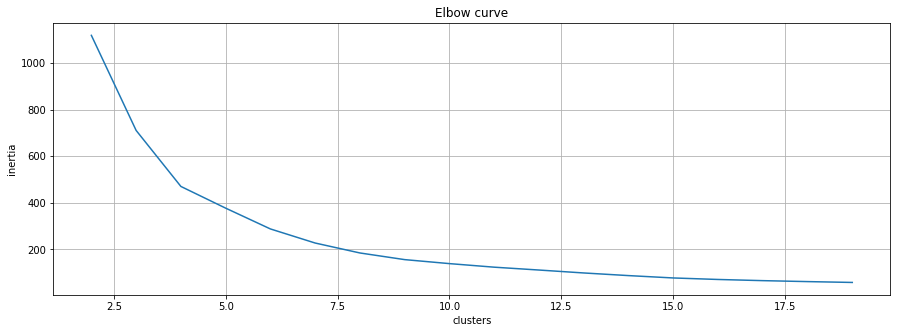

In [55]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_norm)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel("clusters")
plt.ylabel('inertia')
plt.show()

#### Looking at the variables by cluster, we can see that the three clusters that were created were:
* Males 
* Females 
* Elite runners (mixed gender)

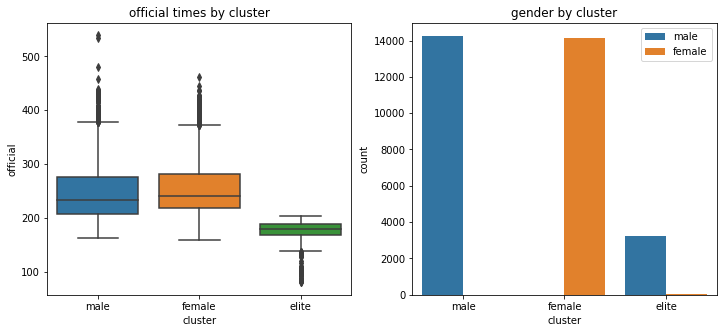

In [61]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.boxplot(x="cluster", y="official", data=df)
plt.xticks(np.arange(3), ('male', 'female', 'elite'))
plt.title("official times by cluster")

plt.subplot(1, 2, 2)
sns.countplot(x="cluster", hue="gender", data=df)
plt.xticks(np.arange(3), ('male', 'female', 'elite'))
plt.legend(('male', 'female'))
plt.title("gender by cluster")

plt.show()

Text(0.5,0,'minutes')

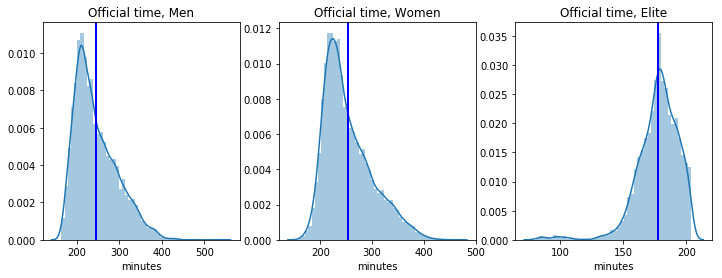

In [65]:
plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
sns.distplot(df['official'][df['cluster'] == 0])
plt.title('Official time, Men')
plt.axvline(df['official'][df['cluster'] == 0].mean(), color='b', linewidth=2)
plt.xlabel("minutes")

plt.subplot(1, 3, 2)
sns.distplot(df['official'][df['cluster'] == 1])
plt.title('Official time, Women')
plt.axvline(df['official'][df['cluster'] == 1].mean(), color='b', linewidth=2)
plt.xlabel("minutes")

plt.subplot(1, 3, 3)
sns.distplot(df['official'][df['cluster'] == 2])
plt.title('Official time, Elite')
plt.axvline(df['official'][df['cluster'] == 2].mean(), color='b', linewidth=2)
plt.xlabel("minutes")

In [68]:
print('Elite:\t',df['official'][df['cluster'] == 2].mean())
print('Men:\t',df['official'][df['cluster'] == 0].mean())
print('Women:\t',df['official'][df['cluster'] == 1].mean())

Elite:	 177.29585932721653
Men:	 244.98835730825914
Women:	 253.85506936579748


#### As you can see from the plots and the mean times, compared to the elite runners, there is not a lot of difference between the men and women runners. 